## 项目概述
* 根据自选的项目数据，结合自己对项目的理解，介绍项目背景、目的、显示数据信息、说明数据集。
* 背景：自行车共享系统是一种租用自行车的方式，通过遍布整个城市的售货亭位置网络，获得会员资格、租赁和自行车归还的过程是自动化的。使用这些系统，人们可以从一个地方租一辆自行车，并根据需要将其归还到不同的地方。目前，全球有超过 500 个共享单车项目。这些系统生成的数据对研究人员很有吸引力，因为旅行的持续时间、出发地点、到达地点和经过的时间都被明确记录下来。因此，共享单车系统充当传感器网络，可用于研究城市中的移动性。
* 目的：通过数据分析观察天气数据之间的关系以及对租车数量的影响
* 数据集说明：数据来自kaggle上预测华盛顿特区首都共享单车。该数据有10886个样本，每个样本有12个特征


In [1]:
#导入一些需要的科学数据包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
data=pd.read_csv('./train.csv')
data.head()#查看前5行数据

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 数据清洗

### 查看数据的信息

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
data.isnull().sum()  #查看是否存在空值

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* 通过data.info()函数发现数据量为10886 条数据，每条数据包括12个特征['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],没有空值，数据的类型为object ，int ，float，

In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


* 通过data.describe()函数查看数据的一些数学属性。可以看出有些特征的量纲差别还是比较大的，如果需要进行机器学习算法的模型预测，特别是一些对距离比较敏感的算法，需要进行统一量纲，标准化。

### 对数据增加新的特征

In [7]:
month=[]
for d in data['datetime']:
    month.append(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").month)
data['month']=pd.DataFrame(data=month)  

In [8]:
date=[]
for d in data['datetime']:
    date.append(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").weekday()+1)  
data=pd.concat([data,pd.DataFrame(date,columns=['weekday'])],axis=1)

In [9]:
hour=[]
for d in data['datetime']:
    hour.append(datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").hour)
data['hour']=pd.DataFrame(data=hour)  

In [10]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,6,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,6,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,6,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,6,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,6,4


## 三、数据分析

### 假期和非假期租车的数量
* 发现假期的租车数量为2027668，非假期的数量为57808

In [11]:
groupby_holiday_count=data["count"].groupby(data['holiday']).sum()
groupby_holiday_count

holiday
0    2027668
1      57808
Name: count, dtype: int64

### 查看一周的7天的租车的数量
* 周一到周日的租车数量：295296, 291985, 292226, 306401, 302504, 311518, 285546

In [12]:
groupby_weekday_count=data["count"].groupby(data['weekday']).sum()
groupby_weekday_count

weekday
1    295296
2    291985
3    292226
4    306401
5    302504
6    311518
7    285546
Name: count, dtype: int64

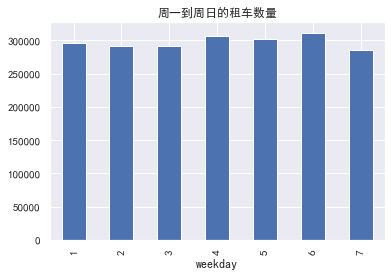

In [15]:
#周一到周日的租车数量可视化
plt.title("周一到周日的租车数量")
groupby_weekday_count.plot(kind='bar')

### 查看工作日的租车的数量
* 工作日租车量为654872，非工作日为1430604

In [17]:
groupby_workingday_count=data["count"].groupby(data['workingday']).sum()
groupby_workingday_count

workingday
0     654872
1    1430604
Name: count, dtype: int64

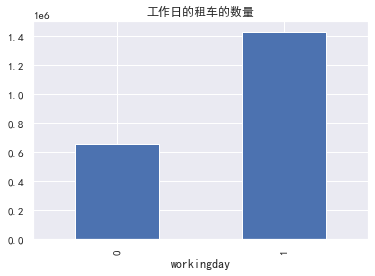

In [18]:
plt.title("工作日的租车的数量")
groupby_workingday_count.plot(kind='bar')

In [3]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
season_holiday_count=data["count"].groupby(data['season']).sum()
season_holiday_count

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

### 季节与租车人数的关系
* 发现在冬天和春天的租车数量比较少，而夏天和秋天的租车数量比较高

([<matplotlib.patches.Wedge at 0x194380bc278>,
 [Text(0.9803503469524417, 0.49891201351563724, '春天'),
  Text(-0.27949617294317647, 1.0638993793165397, '夏天'),
  Text(-0.9449425265542656, -0.5631017861002052, '秋天'),
  Text(0.7508123027644599, -0.8039159695002515, '冬天')],
 [Text(0.5347365528831499, 0.2721338255539839, '15.0%'),
  Text(-0.15245245796900533, 0.5803087523544761, '28.2%'),
  Text(-0.5154231963023267, -0.30714642878193005, '30.7%'),
  Text(0.409533983326069, -0.43849961972740986, '26.1%')])

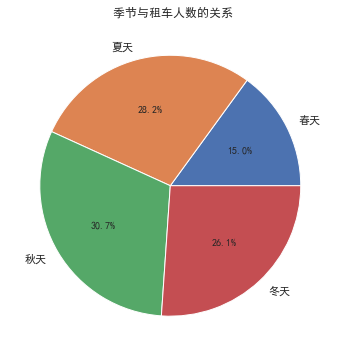

In [9]:
label = ['春天', '夏天',"秋天","冬天"] 
plt.figure(figsize=(10,6)) 
plt.title(' 季节与租车人数的关系')
plt.pie(np.array(season_holiday_count),labels=label, autopct='%1.1f%%')#autopct保留位数

## 数据可视化
* 包括图表及说明，注意种类多样性及数目，依次注清号码。

### 查看不同季节一周的租车的数量
* 其中1-4分别代表：春夏秋冬，发现在冬天和春天的租车数量比较少，而夏天和秋天的租车数量比较高

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


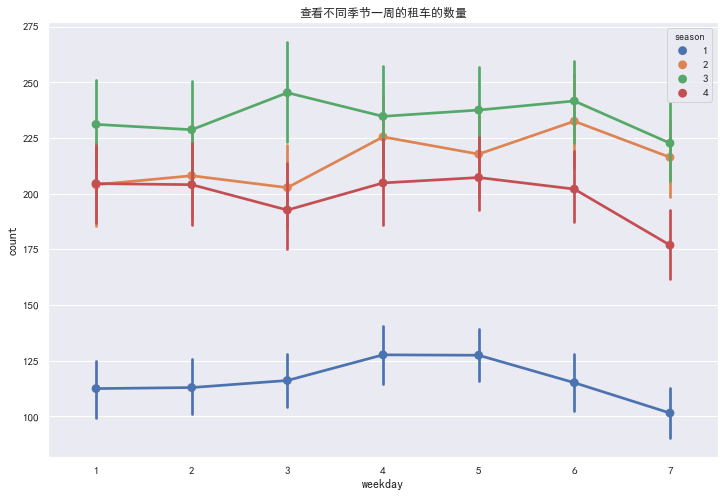

In [20]:
plt.figure(figsize=(12,8)) 
plt.title("查看不同季节一周的租车的数量")
sns.pointplot(data=data, x="weekday", y="count", hue='season')

### 湿度和租车数量的关系
* 通过画图发现湿度在数值40附近租车的数量比较高

Text(0, 0.5, '租车人数')

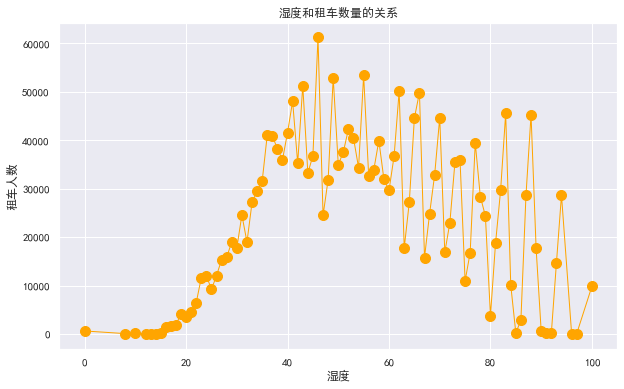

In [297]:
plt.figure(figsize=(10,6)) 
plt.plot(data["count"].groupby(data['humidity']).sum(),color='orange', lw=1, ls='-', marker='o', markersize=10)
plt.title('湿度和租车数量的关系')
plt.xlabel('湿度')
plt.ylabel('租车人数')

### 温度与租车人数的关系
* 通过画图发现温度在25-35摄氏度租车的数量比较多，说明这是一个比较舒适的温度段，在其他温度例如在较低气温0度和气温太高租车的数量比较少

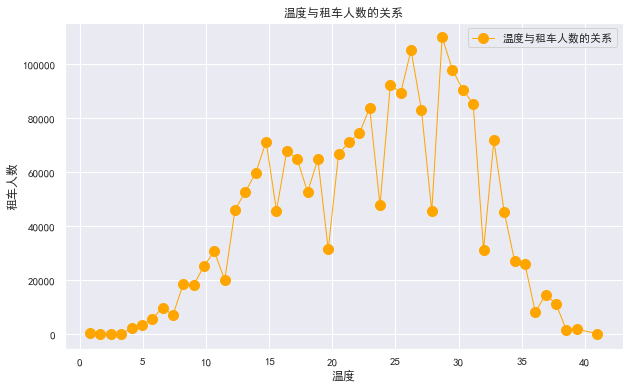

In [299]:
plt.figure(figsize=(10,6)) 
plt.plot(data["count"].groupby(data['temp']).sum(),color='orange', lw=1, ls='-', marker='o', markersize=10)
plt.title('温度与租车人数的关系')
plt.xlabel('温度')
plt.ylabel('租车人数')
plt.legend(["温度与租车人数的关系"], loc=0)  # 图例

### 风速与租车人数的关系
* 发现风速低的时候租车数量比较多,当风速比较大的时候，租车数量急速下降（这是可以解释的，极端天气，注意出行）

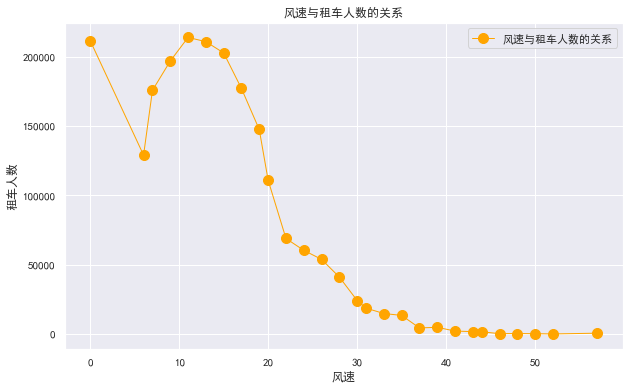

In [300]:
plt.figure(figsize=(10,6)) 
plt.plot(data["count"].groupby(data['windspeed']).sum(),color='orange', lw=1, ls='-', marker='o', markersize=10)
plt.title('风速与租车人数的关系')
plt.xlabel('风速')
plt.ylabel('租车人数')
plt.legend(["风速与租车人数的关系"], loc=0)  

### 注册与非注册人数
* 注册人数达到了81.2%，非注册人数占比18.8%

([<matplotlib.patches.Wedge at 0x1e7377ee5f8>,
 [Text(-0.9135949903676794, 0.6126534041161282, '注册人数'),
  Text(0.9966490491134211, -0.6683492147831953, '非注册人数')],
 [Text(-0.4983245402005524, 0.3341745840633426, '81.2%'),
  Text(0.5813786119828289, -0.3898703752901972, '18.8%')])

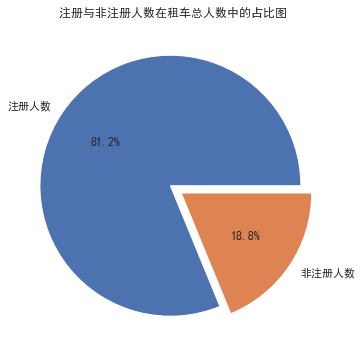

In [304]:
registered=data.registered.sum()
casual=data.casual.sum()
label = ['注册人数', '非注册人数'] 
plt.figure(figsize=(10,6)) 
plt.title(' 注册与非注册人数在租车总人数中的占比图')
explode = (0, 0.1) 
plt.pie([registered,casual], explode=explode,labels=label, autopct='%1.1f%%')#autopct保留位数

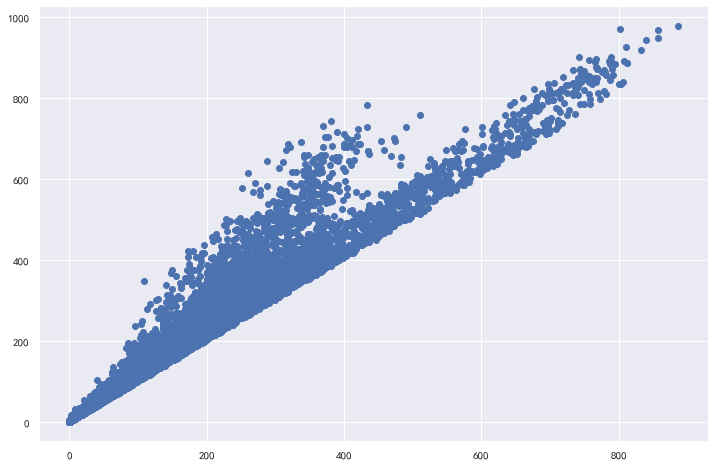

In [35]:
plt.figure(figsize=(12,8)) 
plt.scatter(data["registered"],data['count'])

* 发现注册用户和租车数量成正相关

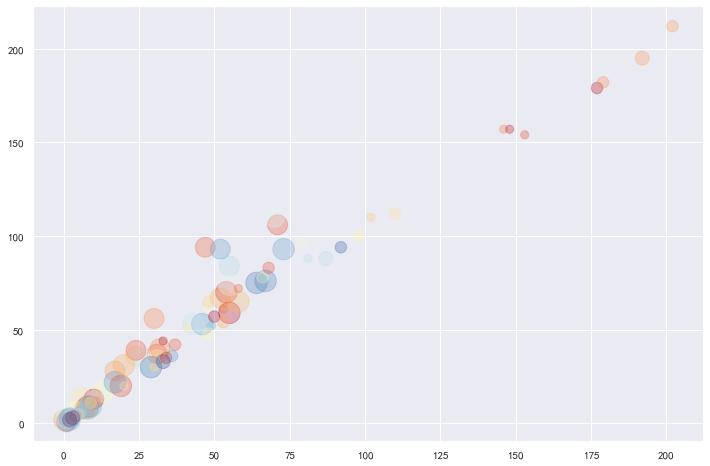

In [33]:
#气泡图
import matplotlib as mlp
plt.figure(figsize=(12,8)) 
plt.scatter(data.iloc[0:100,:]["registered"],data.iloc[0:100,:]['count'],s=data.iloc[0:100,:]['weekday']*66,alpha=0.3, c=np.random.rand(100),cmap=mlp.cm.RdYlBu)

### 天气与租车人数的关系
* 发现在晴朗天气租车数量多，恶劣天气很少

In [10]:
data['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

([<matplotlib.patches.Wedge at 0x19437fa8d68>,
 [Text(-0.6681259157053644, 0.8738465315848479, '晴朗'),
  Text(0.5739748961535874, -1.0538276987180963, '少量云 '),
  Text(1.086934270255328, -0.1690381381360958, '多云 '),
  Text(1.0999999664724138, -0.00027158919116389594, '雨雪')],
 [Text(-0.3644323176574714, 0.4766435626826443, '70.8%'),
  Text(0.33481868942292603, -0.6147328242522228, '24.3%'),
  Text(0.592873238321088, -0.0922026208015068, '4.9%'),
  Text(0.5999999817122256, -0.0001481395588166705, '0.0%')])

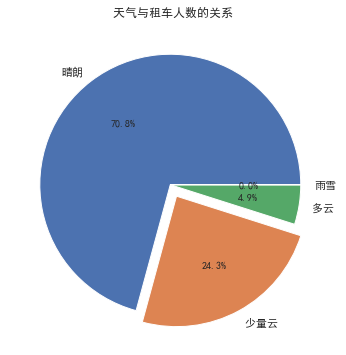

In [13]:
label = ['晴朗','少量云 ','多云 ','雨雪'] 
plt.figure(figsize=(10,6)) 
plt.title(' 天气与租车人数的关系')
explode = (0, 0.1,0,0 ) 
plt.pie(list(np.array(data["count"].groupby(data['weather']).sum())), explode=explode,labels=label, autopct='%1.1f%%')#autopct保留位数

### 月份与租车人数的关系
* 发现租车数量主要集中在5-10月，这也是可以解释，这几个月正好是夏天和秋天

Text(0, 0.5, '租车人数')

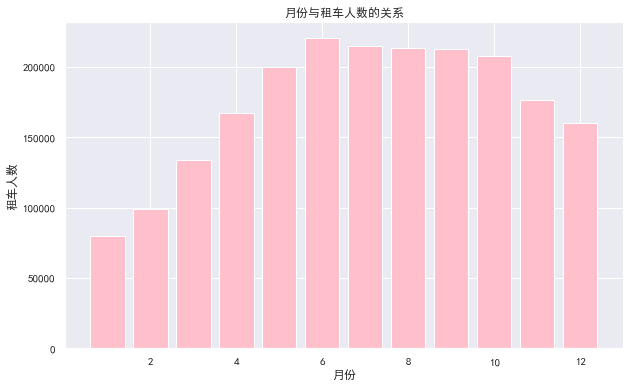

In [309]:
plt.figure(figsize=(10,6)) 
plt.bar(np.arange(1,13),data["count"].groupby(data['month']).sum(),color='pink')
plt.title('月份与租车人数的关系')
plt.xlabel('月份')
plt.ylabel('租车人数')

### 星期与租车人数的关系
* 发现周几对租车的数量影响不大，不过在周六的租车量最高，周末的租车数量最少

Text(0.5, 0, '租车人数')

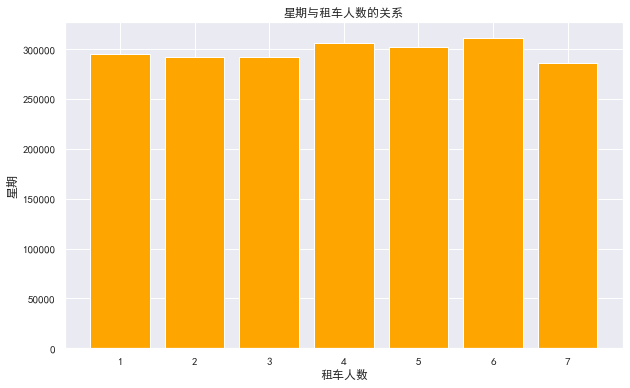

In [21]:
plt.figure(figsize=(10,6)) 
plt.bar(np.arange(1,8),data["count"].groupby(data['weekday']).sum(),color='orange')
plt.title('星期与租车人数的关系')
plt.ylabel('星期')
plt.xlabel('租车人数')

### 小时与租车人数的关系
* 发现一天的租车的数量主要集中在早上8点和下午18点附近这个时间段（这个时间段主要是上下班），其他时间段租车的数量比较少

Text(0.5, 0, '租车人数')

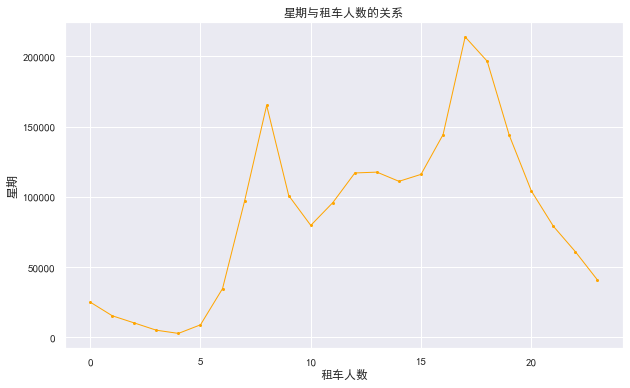

In [311]:
plt.figure(figsize=(10,6)) 
plt.plot(data["count"].groupby(data['hour']).sum(),color='orange', lw=1, ls='-', marker='o', markersize=2)
plt.title('小时与租车人数的关系')
plt.ylabel('小时')
plt.xlabel('租车人数')